# Setup

In [1]:
from numpy.linalg import norm, solve
from numpy import array, eye, copy
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

---

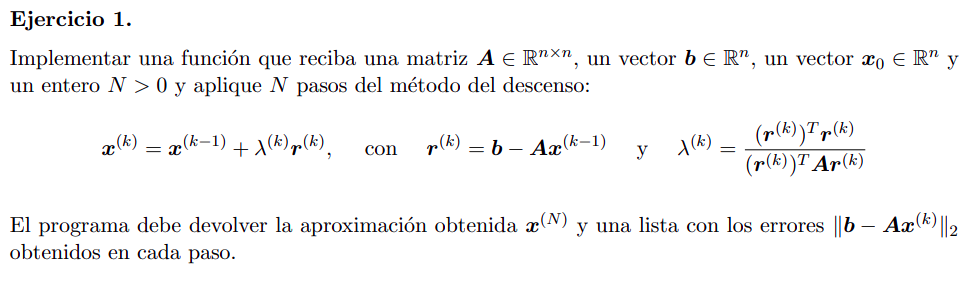

In [2]:
def residuo(A, b, x):
    return b - A@x

In [3]:
def lambda_k(r_k, A):
    return (r_k.T@r_k) / (r_k.T@A@r_k)

In [4]:
def grad_n(A, b ,x_0, N):
    x = x_0
    errores = []
    for i in range(N):
        r_k = residuo(A, b, x)
        x = x + lambda_k(r_k, A) * r_k
        error = norm(b - A@x)
        errores.append(error)
    return x, errores
        

---

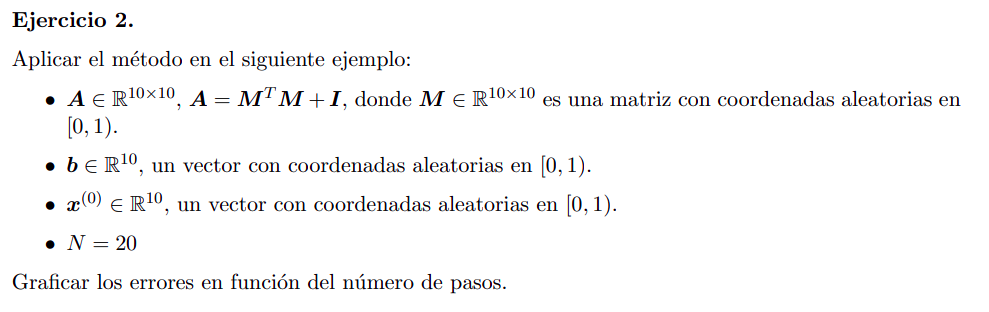

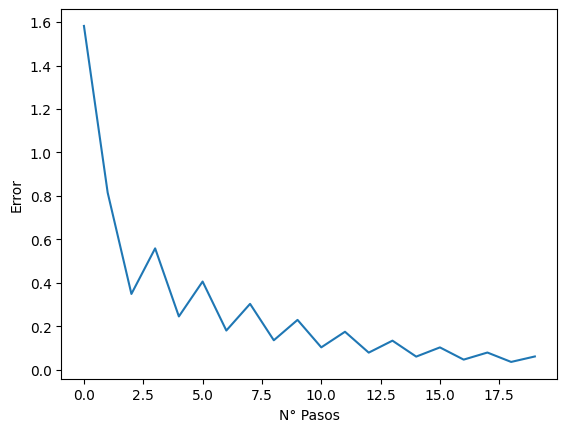

In [5]:
M = rand(10, 10)
A = M.T@M + eye(10)
b = rand(10)
x_0 = rand(10)
N = 20

sol, err = grad_n(A, b, x_0, N)
plt.xlabel("N° Pasos")
plt.ylabel("Error")
plt.plot(err)

plt.show(err)

---

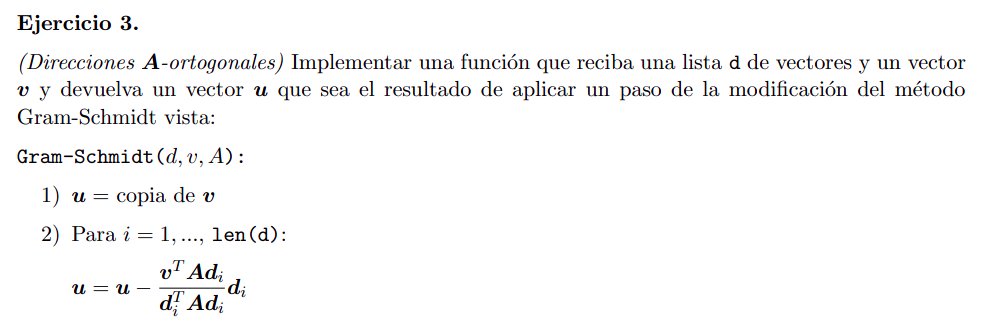

In [6]:
# llamamos a esta proyeccion que tiene esta formula de producto interno A_proyeccion para diferenciarla del producto interno habitual
def A_proyeccion(v, A, d_i):
    return ((v.T @ A @ d_i) / (d_i.T @A@d_i)) * d_i

def gram_schmidt_modificado(d, v, A):
    u = copy(v)
    for i in range (len(d)):
        u = u - A_proyeccion(v, A, d[i])
    return u

---

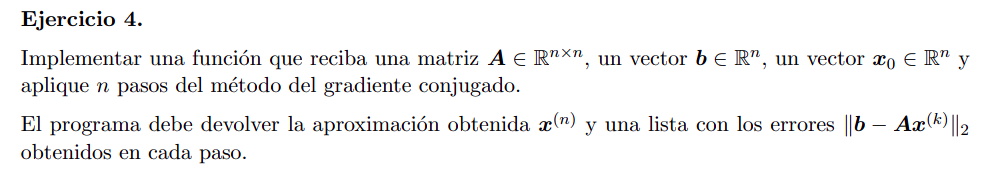

In [7]:
# modificacion del metodo lambda_k previo. Este implementa el residuo y el residuo post gram schmidt
def lambda_conjugado(v, r, A):
    return v.T@r/ (v.T@A@v)

In [8]:
def grad_conjugado(A, b ,x0, N):
    x = x0
    errores = []
    d = []
    for i in range(N):
        r_i = residuo(A, b, x)
        r_i_tilde = gram_schmidt_modificado(d, r_i, A)
        x = x + lambda_conjugado(r_i_tilde, r_i, A) * r_i_tilde
        d.append(r_i_tilde)
        error = norm(b - A@x)
        errores.append(error)
    return x, errores

---

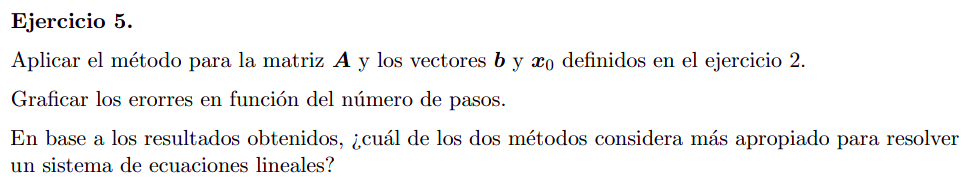

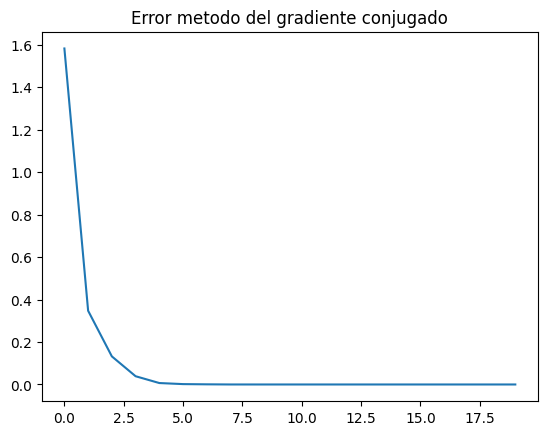

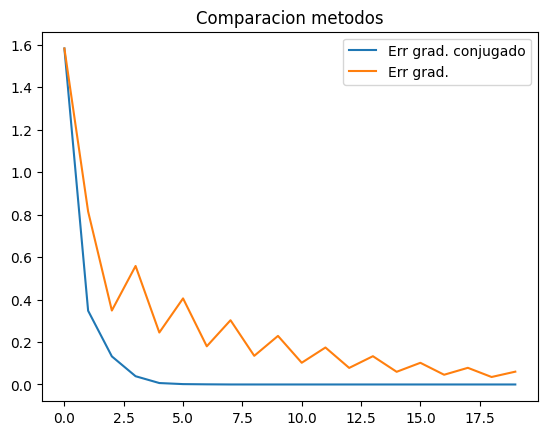

In [9]:
sol, err_conjugado = grad_conjugado(A, b, x_0, N)
plt.plot(err_conjugado)
plt.title("Error metodo del gradiente conjugado")
plt.show()

plt.title("Comparacion metodos")
plt.plot(err_conjugado, label="Err grad. conjugado")
plt.plot(err, label="Err grad. ")
plt.legend()
plt.show()

## Extra
Graficando el logaritmo del error vemos que este desciende considerablemente luego del paso N. Esto es lo esperado en el metodo del gradiente conjugado.

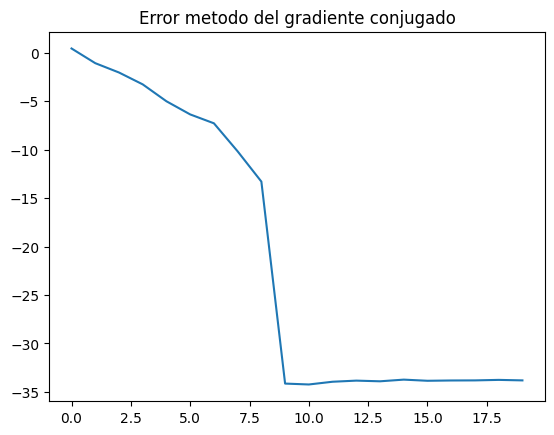

In [10]:
sol, err_conjugado = grad_conjugado(A, b, x_0, N)
plt.plot(np.log(err_conjugado))
plt.title("Error metodo del gradiente conjugado")
plt.show()

## Conclusion:
Vemos que por la naturaleza del metodo del gradiente conjugado en matrices simetricas y definidas positivas, tenemos asegurada la convergencia en N pasos, lo cual no es así para el metodo del gradiente.

Es por este motivo que para la resolucion de un sistema lineal es conveniente optar por el metodo del gradiente conjugado.